In [1]:
import geopandas as gpd
import geojson
import requests

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##Adding in census geographies

# states link
endpoint = 'https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/tigerWMS_ACS2019/MapServer/84/query'
s = requests.session()
s.params = {
    'where': '',
    'text': '',
    'objectIds': '',
    'time': '',
    'geometry': '[[-2336502.536,-20037700.],[1.1615796196E7,2.0656504635E7]]',
    'geometryType': 'esriGeometryEnvelope',
    'inSR': 102100, # EPSG 3857
    'spatialRel': 'esriSpatialRelIntersects',
    'relationParam': '',
#specify fields
    'outFields': 'GEOID,STATE,NAME,STGEOMETRY, OBJECTID',
    'returnGeometry': True,
    'returnTrueCurves': False,
    'maxAllowableOffset': '',
    'geometryPrecision': '',
    'outSR': '',
    'returnIdsOnly': False,
    'returnCountOnly': False,
    'orderByFields': '',
    'groupByFieldsForStatistics': '',
    'outStatistics': '',
    'returnZ': False,
    'returnM': False,
    'gdbVersion': '',
    'returnDistinctValues': False,
    'f': 'geojson',        
}
start = 0
done = False
features = []
crs = None
while not done:
    r = s.get(endpoint, params={
        'resultOffset': start,
        'resultRecordCount': 32,
    })
    r.raise_for_status()
    states = geojson.loads(r.text)
    newfeats = states.__geo_interface__['features']
    if newfeats:
        features.extend(newfeats)
        crs=states.__geo_interface__['crs']
        start += len(newfeats)
        print("Received", len(newfeats), "entries,", start, "total")
    else:
        done = True
states_df = gpd.GeoDataFrame.from_features(features, crs=crs)

Received 32 entries, 32 total
Received 24 entries, 56 total


In [26]:
##Adding in census geographies
state='STATE=36'

# census tracts link
endpoint = 'https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/Tracts_Blocks/MapServer/4/query'
s = requests.session()
s.params = {
    'where': 'STATE=36 AND COUNTY=',
#     'where': 'STATE=36 AND COUNTY=',
    'text': '',
    'objectIds': '',
    'time': '',
    'geometry': '[[-2336502.536,-20037700.],[1.1615796196E7,2.0656504635E7]]',
    'geometryType': 'esriGeometryEnvelope',
    'inSR': 102100, # EPSG 3857
    'spatialRel': 'esriSpatialRelIntersects',
    'relationParam': '',
#specify fields
    'outFields': 'GEOID,STATE,COUNTY,TRACT,STGEOMETRY, OBJECTID',
    'returnGeometry': True,
    'returnTrueCurves': False,
    'maxAllowableOffset': '',
    'geometryPrecision': '',
    'outSR': '',
    'returnIdsOnly': False,
    'returnCountOnly': False,
    'orderByFields': '',
    'groupByFieldsForStatistics': '',
    'outStatistics': '',
    'returnZ': False,
    'returnM': False,
    'gdbVersion': '',
    'returnDistinctValues': False,
    'f': 'geojson',        
}
start = 0
done = False
features = []
crs = None
while not done:
    r = s.get(endpoint, params={
        'resultOffset': start,
        'resultRecordCount': 32,
    })
    r.raise_for_status()
    tracts = geojson.loads(r.text)
    newfeats = tracts.__geo_interface__['features']
    if newfeats:
        features.extend(newfeats)
        crs=tracts.__geo_interface__['crs']
        start += len(newfeats)
        print("Received", len(newfeats), "entries,", start, "total")
    else:
        done = True
tracts_df = gpd.GeoDataFrame.from_features(features, crs=crs)

AttributeError: 'dict' object has no attribute '__geo_interface__'

,geometry,GEOID,STATE,COUNTY,TRACT,NAME,OBJECTID
0,"POLYGON ((-75.63998 42.41297, -75.64000 42.412...",36017970602,36,017,970602,Census Tract 9706.02,31
1,"POLYGON ((-75.85206 42.34533, -75.85205 42.345...",36017971000,36,017,971000,Census Tract 9710,36
2,"POLYGON ((-73.92980 41.10104, -73.92976 41.101...",36087011000,36,087,011000,Census Tract 110,41
3,"POLYGON ((-73.99227 41.18370, -73.99227 41.183...",36087010802,36,087,010802,Census Tract 108.02,42
4,"POLYGON ((-74.23429 41.14301, -74.23304 41.142...",36087011601,36,087,011601,Census Tract 116.01,43


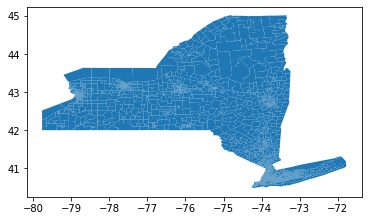

In [20]:
tracts_df.plot()
tracts_df.head()

In [27]:
##Adding in census geographies
state='36'

# micropolitan statistical areas link
endpoint = 'https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/tigerWMS_ACS2019/MapServer/82/query'
s = requests.session()
s.params = {
    'where': 'STATE=36',
    'text': '',
    'objectIds': '',
    'time': '',
    'geometry': '[[-2336502.536,-20037700.],[1.1615796196E7,2.0656504635E7]]',
    'geometryType': 'esriGeometryEnvelope',
    'inSR': 102100, # EPSG 3857
    'spatialRel': 'esriSpatialRelIntersects',
    'relationParam': '',
#specify fields
    'outFields': 'GEOID,CBSA,CSA,NAME,STGEOMETRY, OBJECTID',
    'returnGeometry': True,
    'returnTrueCurves': False,
    'maxAllowableOffset': '',
    'geometryPrecision': '',
    'outSR': '',
    'returnIdsOnly': False,
    'returnCountOnly': False,
    'orderByFields': '',
    'groupByFieldsForStatistics': '',
    'outStatistics': '',
    'returnZ': False,
    'returnM': False,
    'gdbVersion': '',
    'returnDistinctValues': False,
    'f': 'geojson',        
}
start = 0
done = False
features = []
crs = None
while not done:
    r = s.get(endpoint, params={
        'resultOffset': start,
        'resultRecordCount': 32,
    })
    r.raise_for_status()
    mic_sa = geojson.loads(r.text)
    newfeats = mic_sa.__geo_interface__['features']
    if newfeats:
        features.extend(newfeats)
        crs=mic_sa.__geo_interface__['crs']
        start += len(newfeats)
        print("Received", len(newfeats), "entries,", start, "total")
    else:
        done = True
mic_sa_df = gpd.GeoDataFrame.from_features(features, crs=crs)

AttributeError: 'dict' object has no attribute '__geo_interface__'

In [28]:
mic_sa_df.plot()
mic_sa_df.head()

NameError: name 'mic_sa_df' is not defined

In [ ]:
##Adding in census geographies
state='36'

# metropolican statistical areas link
endpoint = 'https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/tigerWMS_ACS2019/MapServer/80/query'
s = requests.session()
s.params = {
    'where': 'STATE=state',
    'text': '',
    'objectIds': '',
    'time': '',
    'geometry': '[[-2336502.536,-20037700.],[1.1615796196E7,2.0656504635E7]]',
    'geometryType': 'esriGeometryEnvelope',
    'inSR': 102100, # EPSG 3857
    'spatialRel': 'esriSpatialRelIntersects',
    'relationParam': '',
#specify fields
    'outFields': 'GEOID,CBSA,CSA,NAME,STGEOMETRY, OBJECTID',
    'returnGeometry': True,
    'returnTrueCurves': False,
    'maxAllowableOffset': '',
    'geometryPrecision': '',
    'outSR': '',
    'returnIdsOnly': False,
    'returnCountOnly': False,
    'orderByFields': '',
    'groupByFieldsForStatistics': '',
    'outStatistics': '',
    'returnZ': False,
    'returnM': False,
    'gdbVersion': '',
    'returnDistinctValues': False,
    'f': 'geojson',        
}
start = 0
done = False
features = []
crs = None
while not done:
    r = s.get(endpoint, params={
        'resultOffset': start,
        'resultRecordCount': 32,
    })
    r.raise_for_status()
    met_sa = geojson.loads(r.text)
    newfeats = met_sa.__geo_interface__['features']
    if newfeats:
        features.extend(newfeats)
        crs=met_sa.__geo_interface__['crs']
        start += len(newfeats)
        print("Received", len(newfeats), "entries,", start, "total")
    else:
        done = True
met_sa_df = gpd.GeoDataFrame.from_features(features, crs=crs)

In [ ]:
met_sa_df.plot()
met_sa_df.head()

In [18]:
tracts_df.to_file('tracts.geojson', driver='GeoJSON')
# met-sa_df.to_file('met-sa.geojson', driver='GeoJSON')
# mic-sa_df.to_file('mic-sa.geojson', driver='GeoJSON')

AttributeError: 'dict' object has no attribute 'lower'